In [44]:
""" This notebook is created to create a model that predicts which passengers survived the Titanic shipwreck."""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [45]:
# Read the train.csv file
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
# Read the test.csv file
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
"""Different Data Wrangling steps taken to clean the training data i.e. train_data"""
# Checking for missing values (NaN) in train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the DataFrame info , we could figure out that there are total **891** records. But the **Age**, **Cabin** & **Embarked** columns don't have 891 non-null entries

In [48]:
# Getting total Actual NaN / missing values in DataFrame by column wise
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age** has **177**, 
**Cabin** has **687**,
**Embarked** has **2**,
Now, we will handle the Missing values for **Age** column

In [49]:
#plt.xlabel("Age")
#plt.ylabel("No.Of Passengers")
#plt.title("Age Vs Number of Passengers")
#train_data.Age.value_counts().plot.bar()
print('Oldest Passenger',train_data.Age.max(),'years','Youngest Passenger',train_data.Age.min(),'years','Mean Age',train_data.Age.mean(),'years')

Oldest Passenger 80.0 years Youngest Passenger 0.42 years Mean Age 29.69911764705882 years


We can assign the all missing values to mean age. But the range of the age column is from 0.42 to 80 Years. We can't assign mean age(around 30 years ) to 1 year baby passenger & also we can't assign age to other passengers as well. Because the age is also crucial feature to predictions. So, I am again filtering the data based on the **Name** column which contains Salutations( titles like Mr. Mrs.) in it. Based on that salutation we can further group the people & assign the mean Age of that group to missing values of respective salutations.

In [50]:
mod_train_data = train_data.copy()
mod_train_data['Title']=mod_train_data.Name.str.extract('([A-Za-z]+)\.')
mod_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [51]:
# Now, group the people by Title & calculate the mean of that group and replace the missing values of that group repectively.
# Repeat the same process for all groups
mod_train_data.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Countess      1
Jonkheer      1
Sir           1
Capt          1
Mme           1
Ms            1
Don           1
Lady          1
Name: Title, dtype: int64

In the above output we have many Titles. In that list also some Titles are incorrect/miss spelled/different language true translation. We need to replace those incorrect Titles with relevant Titles.

In [52]:
mod_train_data['Title'].replace(['Dr','Rev','Mlle','Col','Major','Sir','Lady','Capt','Don','Ms','Jonkheer','Countess','Mme'],
                                ['Unknown','Mr','Miss','Mr','Mr','Mr','Mrs','Mr','Mr','Miss','Mrs','Mrs','Mrs'],inplace=True)
mod_train_data.Title.value_counts()

Mr         530
Miss       185
Mrs        129
Master      40
Unknown      7
Name: Title, dtype: int64

In [53]:
mod_train_data.groupby('Title')['Age'].mean()

Title
Master      4.574167
Miss       21.845638
Mr         32.879562
Mrs        35.892857
Unknown    42.000000
Name: Age, dtype: float64

In [54]:
mod_train_data.loc[(mod_train_data.Age.isnull()) & (mod_train_data.Title == 'Master'),'Age']=4.57
mod_train_data.loc[(mod_train_data.Age.isnull()) & (mod_train_data.Title == 'Miss'),'Age']=21.85
mod_train_data.loc[(mod_train_data.Age.isnull()) & (mod_train_data.Title == 'Mr'),'Age']=32.88
mod_train_data.loc[(mod_train_data.Age.isnull()) & (mod_train_data.Title == 'Mrs'),'Age']=35.89
mod_train_data.loc[(mod_train_data.Age.isnull()) & (mod_train_data.Title == 'Unknown'),'Age']=42

In [55]:
mod_train_data.Age.isnull().any()

False

With this, have completed the handling of missing values in **Age** column. Now, we handle the missing values in **Embarked** column.

In [56]:
mod_train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

As per the description in the Data section in the **Embarked** column contains only 3 values S,C,Q. We can update the 2 missing values with **majority Embarked value**

In [57]:
mod_train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

So, as per the above output. we will update the missing values of Embarked column with 'S'

In [58]:
mod_train_data.loc[mod_train_data.Embarked.isnull(),'Embarked']='S'
mod_train_data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [59]:
mod_train_data.Embarked.isnull().any()

False

With this we have updated the missing values in Embarked column as well.

In [60]:
mod_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


Checking for the Total Survival Percentage in training data

In [ ]:
total_survived = mod_train_data.loc[mod_train_data.Survived==1]['PassengerId'].count()
total_survived
total_passengers = mod_train_data['PassengerId'].count()
total_passengers
total_survived_pcent = total_survived / total_passengers * 100
print("Total Survival Percentage : %s" %total_survived_pcent)

Visual Represenntation Of Total Survival

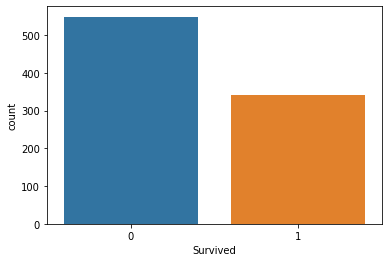

In [62]:
sns.countplot(x="Survived", data=mod_train_data)


In general, the survival possibility depends on many biological factors like Age, Gender etc. In the training data, we are given with Age & Gender. We will see how gender influences survival based on our training data.

In [63]:
# Sruvival Percentage of Male
male_survived = mod_train_data.loc[mod_train_data.Sex=='male']['Survived']
survived_male_pcent = sum(male_survived)/len(male_survived)*100
print("Percentage of Male survived : %s" %survived_male_pcent)

Percentage of Male survived : 18.890814558058924


In [64]:
# Sruvival Percentage of Female
female_survived = mod_train_data.loc[mod_train_data.Sex=='female']['Survived']
survived_female_pcent = sum(female_survived)/len(female_survived)*100
print("Percentage of Female survived : %s" %survived_female_pcent)

Percentage of Female survived : 74.20382165605095


Clearly from the above results. Gender influences the survival as we can see that percentage of survival for Female is more than Male. we need to use this gender as one of our input feature. Lets put this in visual representation.

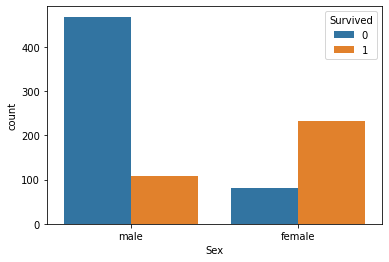

In [65]:
sns.countplot(x="Sex", hue="Survived", data=mod_train_data)

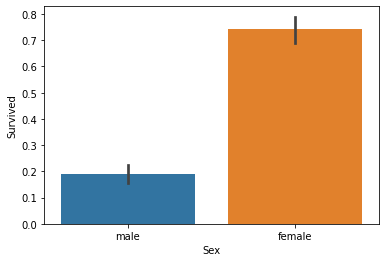

In [66]:
sns.barplot(x="Sex", y="Survived", data=mod_train_data)

Now, we will see, how the Age group influences the survival of passengers.

In [67]:
mod_train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Unknown'], dtype=object)

In [68]:
# Sruvival Percentage of Mr Group
Mr_survived = mod_train_data.loc[mod_train_data.Title=='Mr']['Survived']
survived_Mr_pcent = sum(Mr_survived)/len(Mr_survived)*100
print("Percentage of Mr survived : %s" %survived_Mr_pcent)

Percentage of Mr survived : 15.849056603773585


In [69]:
# Sruvival Percentage of Mrs Group
Mrs_survived = mod_train_data.loc[mod_train_data.Title=='Mrs']['Survived']
survived_Mrs_pcent = sum(Mrs_survived)/len(Mrs_survived)*100
print("Percentage of Mrs survived : %s" %survived_Mrs_pcent)

Percentage of Mrs survived : 79.06976744186046


In [70]:
# Sruvival Percentage of Miss Group
Miss_survived = mod_train_data.loc[mod_train_data.Title=='Miss']['Survived']
survived_Miss_pcent = sum(Miss_survived)/len(Miss_survived)*100
print("Percentage of Miss survived : %s" %survived_Miss_pcent)

Percentage of Miss survived : 70.27027027027027


In [71]:
# Sruvival Percentage of Master Group
Master_survived = mod_train_data.loc[mod_train_data.Title=='Master']['Survived']
survived_Master_pcent = sum(Master_survived)/len(Master_survived)*100
print("Percentage of Master survived : %s" %survived_Master_pcent)

Percentage of Master survived : 57.49999999999999


In [72]:
# Sruvival Percentage of Unknown Group
Unknown_survived = mod_train_data.loc[mod_train_data.Title=='Unknown']['Survived']
survived_Unknown_pcent = sum(Unknown_survived)/len(Unknown_survived)*100
print("Percentage of Unknown survived : %s" %survived_Unknown_pcent)

Percentage of Unknown survived : 42.857142857142854


It is clearly from the above results. Survival rate is more than 50 % in Miss, Mrs, Master groups. So Age group significantly influences the survival. we need to include this feature in prediction model. Visual representation of above results.

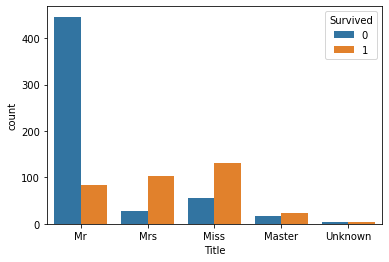

In [73]:
sns.countplot(x="Title", hue="Survived", data=mod_train_data)

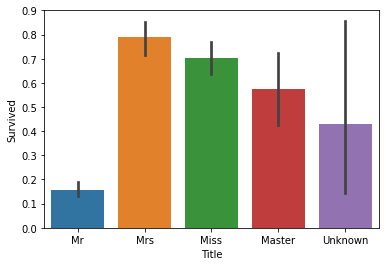

In [74]:
sns.barplot(x="Title", y="Survived", data=mod_train_data)

Lets check the survival relationship with Passenger class ( Pclass)

In [75]:
mod_train_data.Pclass.unique()

array([3, 1, 2])

In [76]:
# Sruvival Percentage of Pclass1 Group
Pclass1_survived = mod_train_data.loc[mod_train_data.Pclass==1]['Survived']
survived_Pclass1_pcent = sum(Pclass1_survived)/len(Pclass1_survived)*100
print("Percentage of Pclass1 survived : %s" %survived_Pclass1_pcent)

Percentage of Pclass1 survived : 62.96296296296296


In [77]:
# Sruvival Percentage of Pclass2 Group
Pclass2_survived = mod_train_data.loc[mod_train_data.Pclass==2]['Survived']
survived_Pclass2_pcent = sum(Pclass2_survived)/len(Pclass2_survived)*100
print("Percentage of Pclass2 survived : %s" %survived_Pclass2_pcent)

Percentage of Pclass2 survived : 47.28260869565217


In [78]:
# Sruvival Percentage of Pclass3 Group
Pclass3_survived = mod_train_data.loc[mod_train_data.Pclass==3]['Survived']
survived_Pclass3_pcent = sum(Pclass3_survived)/len(Pclass3_survived)*100
print("Percentage of Pclass3 survived : %s" %survived_Pclass3_pcent)

Percentage of Pclass3 survived : 24.236252545824847


From the Above results. it is clearly evident that rate of survival is high for Pclass1 & is following decreasing pattern for Pclass2 , Pclass3. we need to include this feature in prediction model. Let's see the visual of above data points.

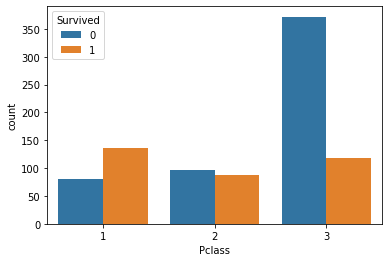

In [79]:
sns.countplot(x="Pclass", hue="Survived", data=mod_train_data)

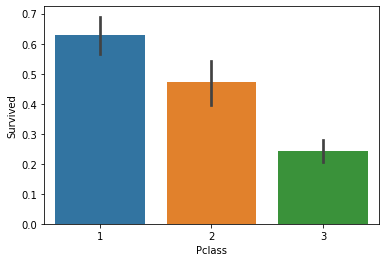

In [80]:
sns.barplot(x="Pclass", y="Survived", data=mod_train_data)

we will survival pattern based on SibSP feature

In [81]:
mod_train_data[["SibSp", "Survived"]].groupby('SibSp').sum()

,Survived
SibSp,
0,210
1,112
2,13
3,4
4,3
5,0
8,0


In [82]:
mod_train_data[["SibSp", "Survived"]].groupby('SibSp').mean()*100

,Survived
SibSp,
0,34.539474
1,53.588517
2,46.428571
3,25.000000
4,16.666667
5,0.000000
8,0.000000


From the above results. the survival rate is more for SibSp as 1. We need to include this as one of feature for prediction. Lets see the visual of above result.

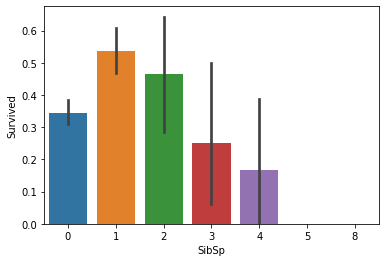

In [83]:
sns.barplot(x="SibSp",y="Survived",data=mod_train_data)

we will survival pattern based on Parch feature

In [84]:
mod_train_data[["Parch","Survived"]].groupby("Parch").sum()

,Survived
Parch,
0,233
1,65
2,40
3,3
4,0
5,1
6,0


In [85]:
mod_train_data[["Parch","Survived"]].groupby("Parch").mean()*100

,Survived
Parch,
0,34.365782
1,55.084746
2,50.000000
3,60.000000
4,0.000000
5,20.000000
6,0.000000


From the above results. the survival rate is more for Parch as 3. We need to include this as one of feature for prediction. Lets see the visual of above result.

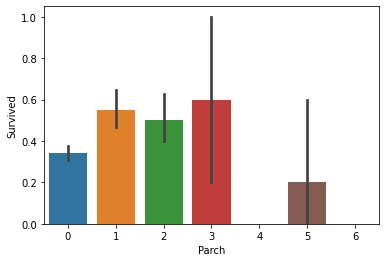

In [86]:
sns.barplot(x="Parch",y="Survived",data=mod_train_data)

Remaining features are not required for developing a model as they are not significant & relevant to the survival of passengers.